# Using Afinn Lexicon

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from afinn import Afinn
af = Afinn()
#!pip install afinn

### Function to call to get positive/negative votes

In [64]:
def NoOfPosNeg(filename):
    data = pd.read_csv(filename,encoding='latin1', names = ['username','datetime','tweet'])
    sentiment_score = [af.score(tweet) for tweet in data['tweet']]
    sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]
    df = pd.DataFrame([list(data['username']), list(data['tweet']), sentiment_score, sentiment_category]).T
    df.columns = ['username', 'tweet', 'sentiment_score', 'sentiment_category']
    df['sentiment_score'] = df.sentiment_score.astype('float')
    list_of_sentiment_scores = df.groupby('username')['sentiment_score'].mean()
    all_sentiment_category = ['positive' if score > 0 
                              else 'negative' if score < 0 
                                  else 'neutral' 
                                      for score in list_of_sentiment_scores]
    return all_sentiment_category

In [65]:
clintons = NoOfPosNeg('HillaryClinton.csv')

In [66]:
trump = NoOfPosNeg('Trump2.csv')

In [83]:
clintons_pos = clintons.count('positive')
trump_pos = trump.count('positive')
clintons_neg = clintons.count('negative')
trump_neg = trump.count('negative')
print(len(trump))
print(len(clintons))

19318
14151


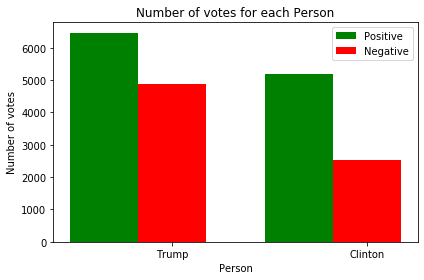

In [84]:
#votes_dic = {'trump': trump, 'clintons': clintons}
#votes = pd.DataFrame(votes_dic)
#votes

fig, ax = plt.subplots()
index = np.arange(2)
bar_width = 0.35
opacity = 0.8

Positive = (trump_pos, clintons_pos)
Negative = (trump_neg, clintons_neg)

Positive_bar = plt.bar(index, Positive, bar_width, color='g', label='Positive')
Negative_bar = plt.bar(index + bar_width, Negative, bar_width, color='r', label='Negative')

plt.xlabel('Person')
plt.ylabel('Number of votes')
plt.title('Number of votes for each Person')
plt.xticks(index + bar_width,('Trump', 'Clinton'))
plt.legend()

plt.tight_layout()
plt.show()

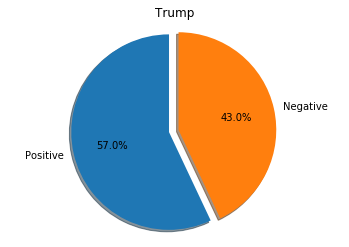

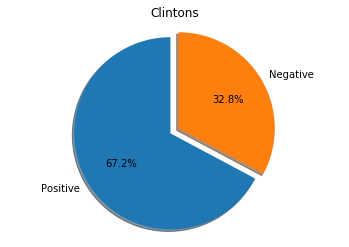

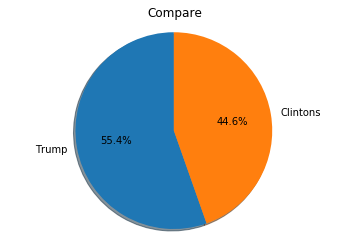

In [89]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
#for trump:
labels = 'Positive', 'Negative'
sizes = [trump_pos, trump_neg]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Trump')
plt.show()

#for clinton:
sizes = [clintons_pos, clintons_neg]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Clintons')
plt.show()

# compare
labels = 'Trump', 'Clintons'
sizes = [trump_pos, clintons_pos]
explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Compare')
plt.show()

### Overall without looking at users/months

In [46]:
both = pd.read_csv('Both.csv',encoding='latin1', names = ['username','datetime','tweet','from'])
sentiment_scores = [af.score(tweet) for tweet in both['tweet']]
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]
# sentiment statistics per trump/clinton
df = pd.DataFrame([list(both['tweet']), sentiment_scores, sentiment_category, list(both['from'])]).T
df.columns = ['tweet', 'sentiment_score', 'sentiment_category','from']
df.groupby(by=['from']).describe()

tweet                                          sentiment_score  \
          count  unique                        top  freq           count   
from                                                                       
Hillary   81789   81789  I heard Hillary does too.     1         81789.0   
Trump    197428  142633     Forecast: Fine weather  6500        197428.0   

                             sentiment_category                         
        unique  top     freq              count unique      top   freq  
from                                                                    
Hillary   34.0  0.0  44782.0              81789      3  neutral  44782  
Trump     48.0  0.0  82910.0             197428      3  neutral  82910

In [11]:
df['sentiment_category'].value_counts()

neutral     127692
negative     77881
positive     73644
Name: sentiment_category, dtype: int64

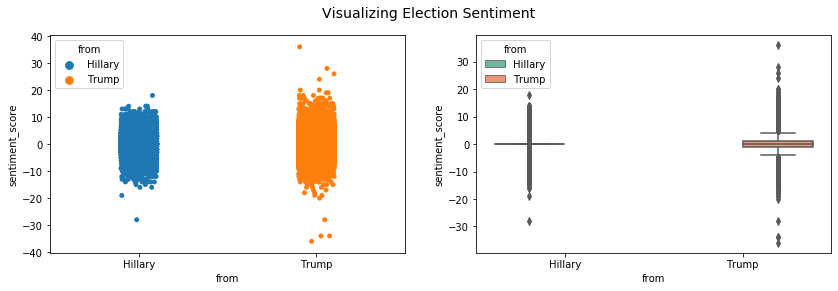

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='from', y="sentiment_score", 
                   hue='from', data=df, ax=ax1)
bp = sns.boxplot(x='from', y="sentiment_score", 
                 hue='from', data=df, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing Election Sentiment', fontsize=14)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


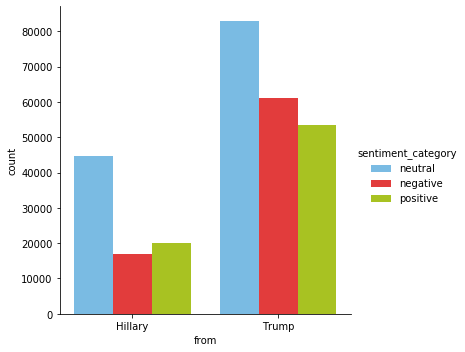

In [14]:
fc = sns.factorplot(x="from", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})